In [18]:
from data_treat.get_ready_data import get_data
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from data_treat.data_normalizer import CustomNormalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

In [19]:
COLUMNS = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price",
           "repeat_retailer","used_chip","used_pin_number","online_order", "fraud"]

In [20]:
data = get_data()
pd.value_counts(data['fraud'])

0.0    87403
1.0    87403
Name: fraud, dtype: int64

In [21]:
data.values

array([[ 0.58189057,  0.63481628,  2.61856761, ...,  1.        ,
         1.        ,  0.        ],
       [11.82737126, 11.32580071,  4.90825631, ...,  0.        ,
         1.        ,  1.        ],
       [91.93273374, 60.61943711, 12.60045712, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 3.28033205,  5.2351786 ,  4.42495785, ...,  0.        ,
         1.        ,  1.        ],
       [ 6.11657299,  1.44857809,  4.12829049, ...,  0.        ,
         1.        ,  1.        ],
       [ 5.69811459,  0.11971158,  0.20502942, ...,  0.        ,
         0.        ,  0.        ]])

In [22]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13798,0.581891,0.634816,2.618568,0.0,1.0,1.0,1.0,0.0
138060,11.827371,11.325801,4.908256,1.0,1.0,0.0,1.0,1.0
217704,91.932734,60.619437,12.600457,1.0,0.0,0.0,1.0,1.0
895394,1.388012,0.136348,9.288531,0.0,0.0,0.0,1.0,1.0
79748,17.650940,0.250955,1.436782,1.0,0.0,0.0,1.0,0.0


In [23]:
target_variable_name = 'fraud'
labels = data[target_variable_name]
data = data.drop(target_variable_name, axis=1)


In [24]:
labels.head()


13798     0.0
138060    1.0
217704    1.0
895394    1.0
79748     0.0
Name: fraud, dtype: float64

In [25]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
13798,0.581891,0.634816,2.618568,0.0,1.0,1.0,1.0
138060,11.827371,11.325801,4.908256,1.0,1.0,0.0,1.0
217704,91.932734,60.619437,12.600457,1.0,0.0,0.0,1.0
895394,1.388012,0.136348,9.288531,0.0,0.0,0.0,1.0
79748,17.650940,0.250955,1.436782,1.0,0.0,0.0,1.0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.33)

In [34]:
def model_func(x_train, x_test):
    def gridSearch(X,y):

        param_dict = {
        'n_neighbors': np.arange(1,3,1),
        }
        model = KNeighborsClassifier()
        gv = GridSearchCV(model,param_grid=param_dict)
        gv.fit(X,y)
        return gv.best_score_,gv.best_params_



    params = gridSearch(x_train, y_train)
    print(params)

    model = KNeighborsClassifier(n_neighbors=params[1]['n_neighbors'])
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    print("Accuracy : ",accuracy_score(y_test,predictions)*100)
    print(confusion_matrix(y_test, predictions))

    test_probabilities = model.predict_proba(x_test)
    test_probabilities = test_probabilities[:, 1]
    false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, test_probabilities)

    plt.figure(figsize=(7, 7))

    # рисуем кривую
    plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

    # кривая, соответствующая случайному угадыванию
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='площадь под кривой (ROC-AUC)')
    plt.legend()
    plt.show()

    roc_auc_value = roc_auc_score(y_test, test_probabilities)

    print("ROC-AUC на тестовой выборке:", roc_auc_value)

Для сырых данных

Для нормализованных данных

(0.9699709699453551, {'n_neighbors': 1})
Accuracy :  97.05994522067746
[[27563  1336]
 [  360 28427]]


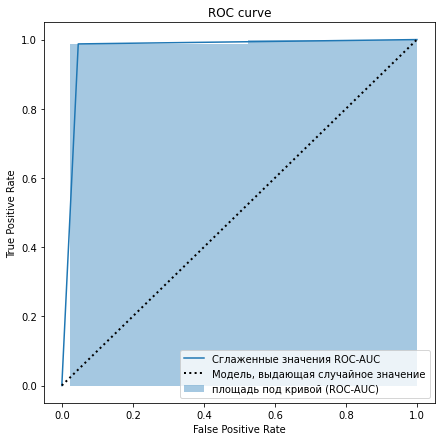

ROC-AUC на тестовой выборке: 0.9706321908676802


In [35]:
model_func(x_train, x_test)

Для Нормализованных данных

(0.9966700819672131, {'n_neighbors': 1})
Accuracy :  90.15012308012342
[[23422  5477]
 [  205 28582]]


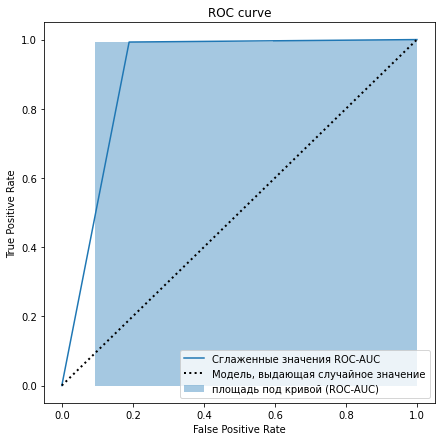

ROC-AUC на тестовой выборке: 0.90167830059445


In [36]:
model_func(CustomNormalizer.normalize(x_train),CustomNormalizer.normalize(x_test))

Для стандартизированных данных


(0.9965761612021857, {'n_neighbors': 1})
Accuracy :  99.29098914814686
[[28748   151]
 [  258 28529]]


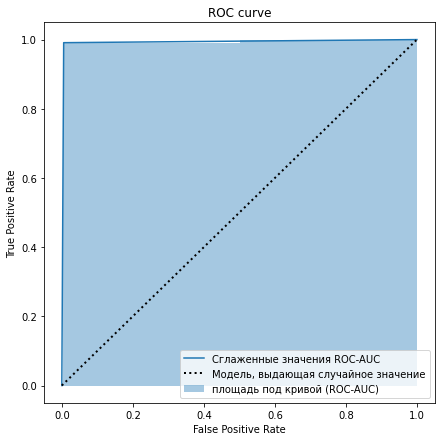

ROC-AUC на тестовой выборке: 0.9929062634272574


In [37]:
model_func(CustomNormalizer.standardize(x_train),CustomNormalizer.standardize(x_test))